In [35]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [36]:
df = pd.read_csv('data/Pokemon.csv')
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

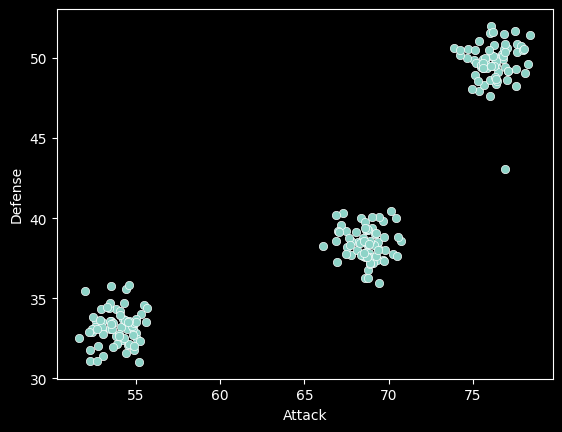

In [37]:
X = df[['Attack', 'Defense']]
sns.scatterplot(df.Attack, df.Defense)

In [38]:
# импортируем нужный модуль k-means-кластеризации


# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = k_means.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = k_means.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

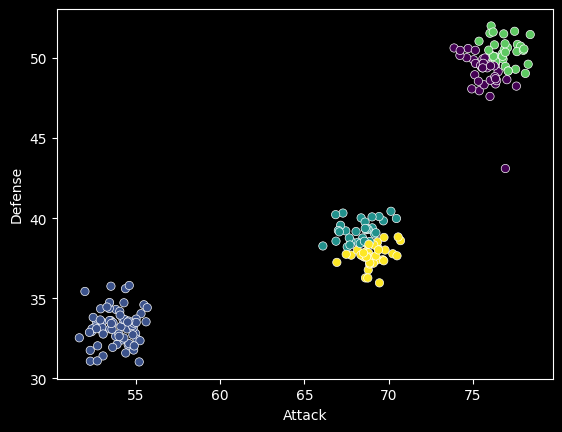

In [39]:
sns.scatterplot(df.Attack, df.Defense, c=predictions)

In [40]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

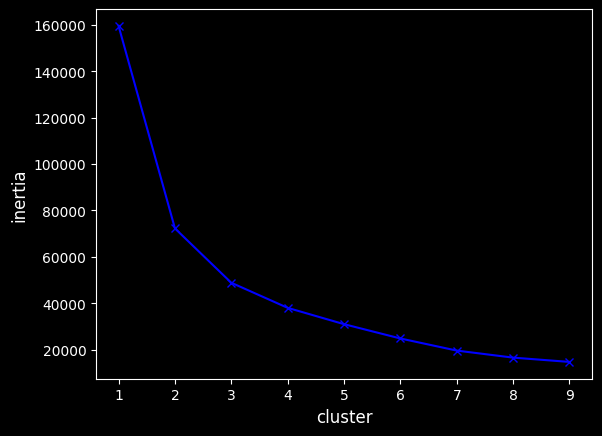

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []

for cluster_num in range(1,10):
    inertia.append(get_inertia(cluster_num,X))

plt.xlabel('cluster', fontsize=12)
plt.ylabel('inertia', fontsize=12)

plt.plot([i for i in range(1,10)], inertia, 'xb-')

[0.4575637148632728,
 0.3738598545787158,
 0.4000907249808589,
 0.36380530487519286,
 0.3896294142266388,
 0.42696770420293195,
 0.4462592260880442,
 0.44849339252042864]

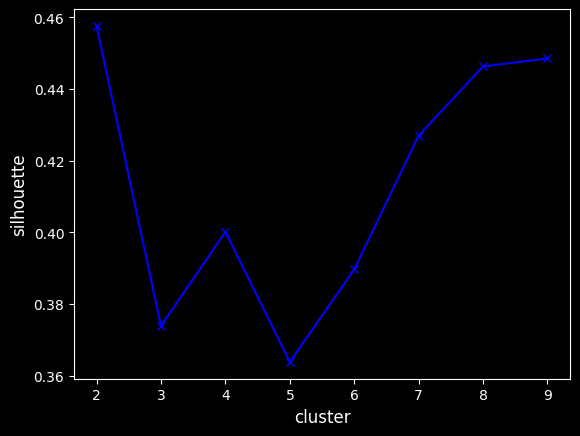

In [42]:
from sklearn.metrics import silhouette_score
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouettes = []
for cluster_num in range(2, 10):
    silhouettes.append(get_silhouette(cluster_num, X))
    
display(silhouettes)

plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
plt.plot([i for i in range(2,10)], silhouettes, 'xb-')

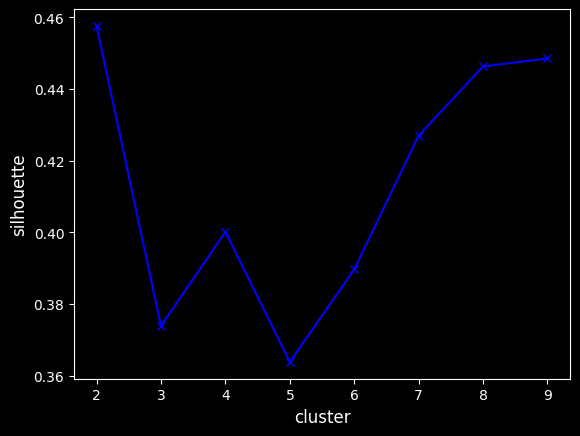

In [43]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

In [44]:
df = pd.read_csv('data/values_from_the_instrument.csv')
df.head(10)

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278
5,63.460035,60.134125
6,57.650859,73.063800
7,57.686945,76.317818
8,64.163588,58.475185
9,60.712352,73.484624


c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1', ylabel='x2'>

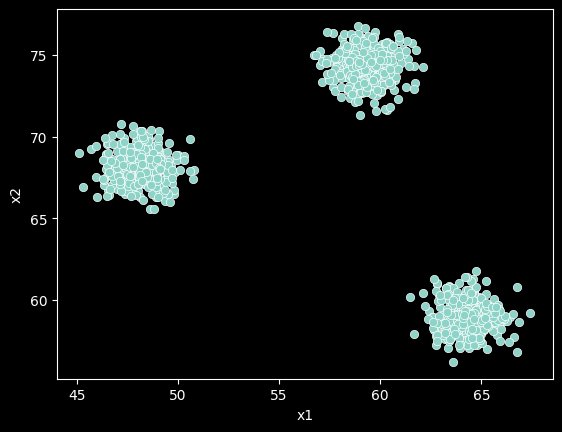

In [45]:
X = df[['x1', 'x2']]
sns.scatterplot(df.x1, df.x2)

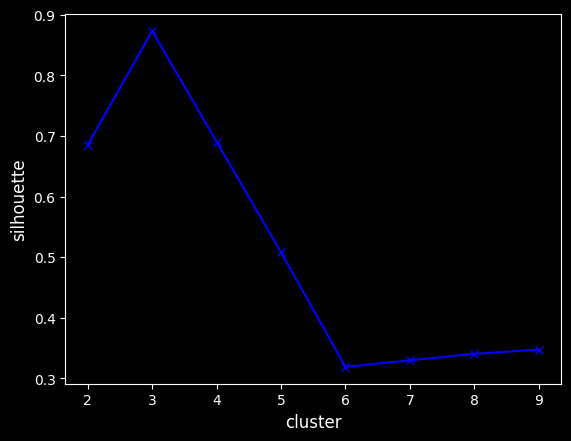

In [46]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

In [47]:
from sklearn.metrics.cluster import homogeneity_score

print(homogeneity_score(labels_true=[0,0,1,1], labels_pred=[0,0,1,1]))

1.0


In [48]:
from sklearn.metrics.cluster import completeness_score

completeness_score(labels_true=[0,0,1,1], labels_pred=[0,0,1,1])

1.0

In [49]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])
1.0

1.0

In [50]:
from sklearn.metrics.cluster import homogeneity_score

print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))

0.737175493807016


In [51]:
houses = pd.read_csv('data/housing.csv')
houses.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

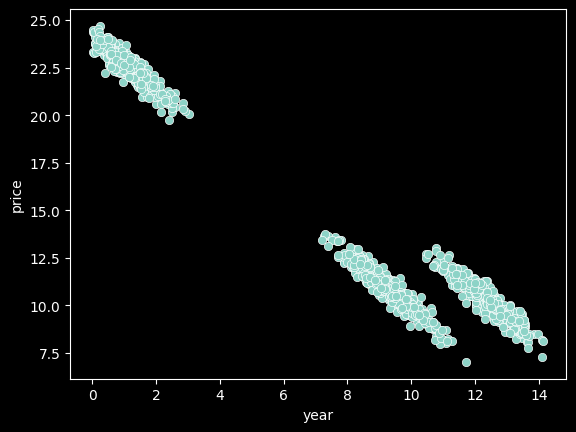

In [52]:
sns.scatterplot(houses.year, houses.price)

In [53]:
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

gm_clustering.fit(houses)

gm_prediction = gm_clustering.predict(houses)

In [54]:
predictions = kmeans.labels_

c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

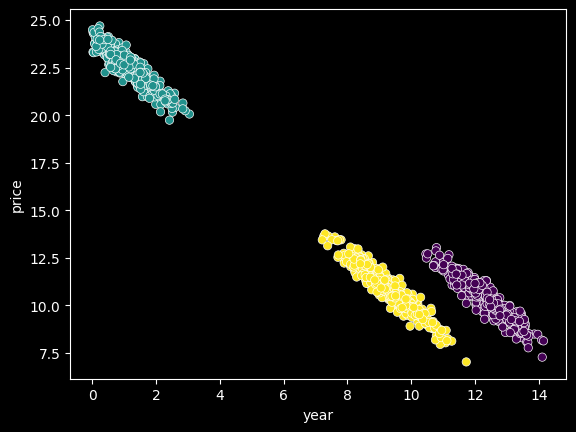

In [55]:
sns.scatterplot(houses.year, houses.price, c=gm_prediction)

In [56]:
# импортируем нужный модуль k-means-кластеризации


# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(houses)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = k_means.predict(houses)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = k_means.labels_

# сохраним предсказания в датафрейм
houses['Clusters_k3'] = predictions
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

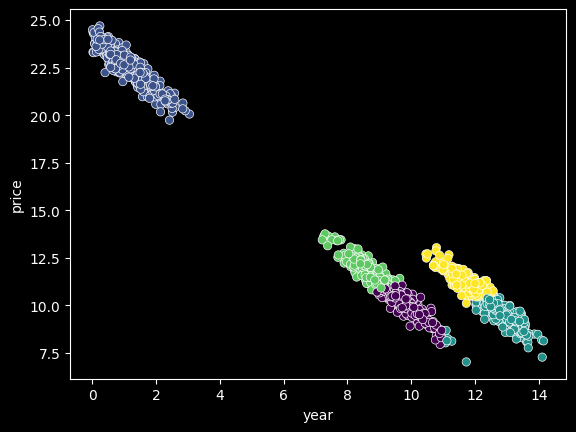

In [57]:
sns.scatterplot(houses.year, houses.price, c=predictions)

In [58]:
df = pd.read_csv('data/Pokemon.csv')

In [59]:
from sklearn.cluster import SpectralClustering

spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])

spectral_predictions = spectral_clustering.labels_

c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

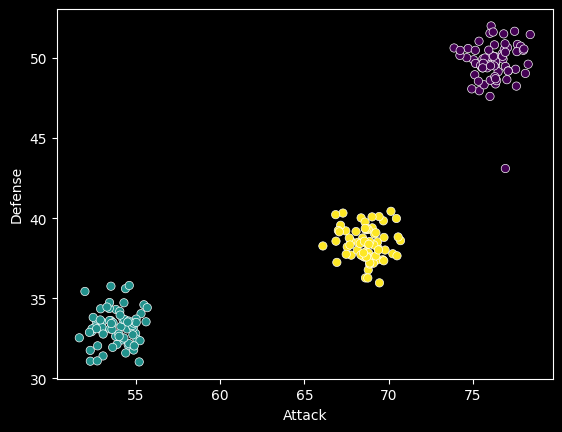

In [60]:
sns.scatterplot(df.Attack, df.Defense, c=spectral_clustering.labels_)

c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

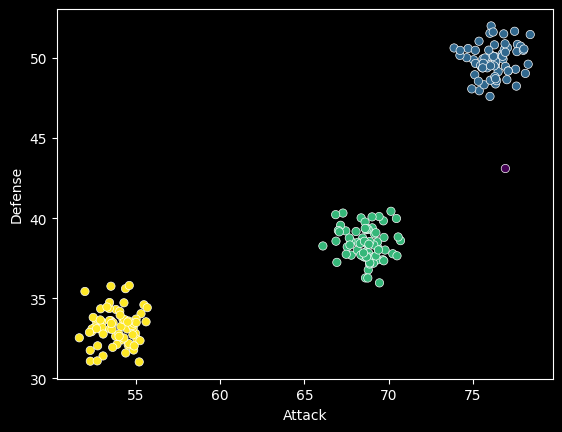

In [61]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

sns.scatterplot(df.Attack, df.Defense, c=clustering.labels_)

In [62]:
houses = pd.read_csv('data/housing.csv')
display(houses.head())

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

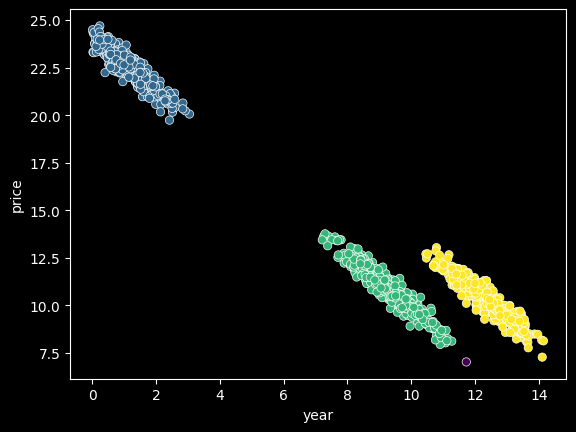

In [63]:
clustering = DBSCAN(eps = 0.7, min_samples = 5).fit(houses[['year', 'price']])

sns.scatterplot(houses.year, houses.price, c=clustering.labels_)

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(X)
pca.transform(X)

array([[-6.89279823, -4.82307892],
       [-2.12187908,  7.40318272],
       [-7.70155325, -4.93523206],
       ...,
       [ 9.59588257, -3.11441423],
       [-7.85099772, -6.36852066],
       [ 9.71333699, -2.16939444]])

In [69]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml('mnist_784')

X = dataset['data']
y = dataset['target']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)
trainn_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
pca.fit(train_x)

train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

print(len(train_x))
print(len(train_x_pca))

63000
63000


c:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [73]:
print(len(train_x))
print(len(train_x_pca))

KeyError: 0

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    start_time = time()
    log_reg_model.fit(train_x, train_y)
    end_time = time()
    time = end_time - start_time
    y_pred = log_reg_model.predict(test_x)
    score = accuracy_score(test_y, y_pred)
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)

print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")

c:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 87.25268220901489, метрика модели 0.08714285714285715
Модель, построенная на всех исходных признаках. Время обучения 200.30911207199097, метрика модели 0.614


c:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [79]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
tsne.fit_transform(X)

c:\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  8.208814  ,   0.60978097],
       [ 13.969618  ,   4.859159  ],
       [-17.376978  ,   6.6886    ],
       ...,
       [-17.62247   ,  -4.6568294 ],
       [  2.6963573 ,   4.4429364 ],
       [  9.612172  ,   9.499765  ]], dtype=float32)

<AxesSubplot:xlabel='0', ylabel='1'>

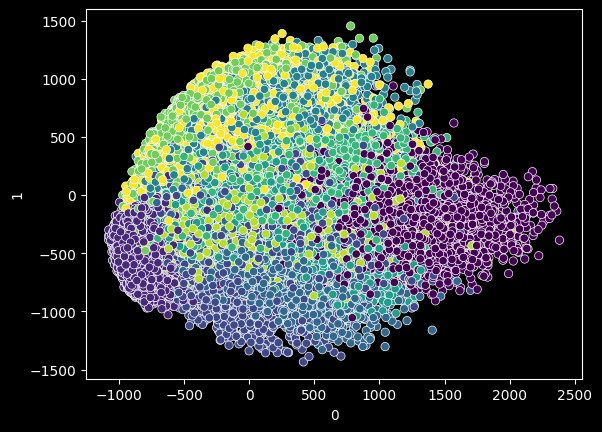

In [81]:
import seaborn as sns

pca = PCA(n_components=2, random_state=42)

X_reduced = pca.fit_transform(train_x)
df_pca = pd.DataFrame(X_reduced)
df_pca['C'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['C'])

In [82]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)

X_reduced = tsne.fit_transform(train_x)



c:\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

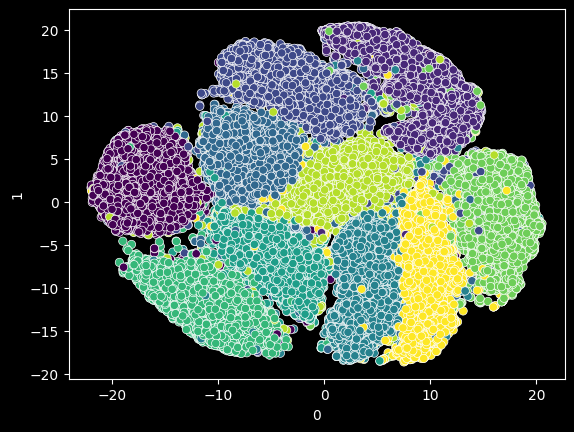

In [84]:
df_reduced = pd.DataFrame(X_reduced)
df_reduced['C'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_reduced[0], y=df_reduced[1], c=df_reduced['C'])